In [1]:
 %%capture
  !pip install rdkit
  !pip install pyscf

In [2]:
# Importamos librerías
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from pyscf import gto, scf


Isómero CIS


In [16]:
# representación SMILES del isómero CIS
smi_cis = "O=C/C"
# elemento de RDKit
cis = Chem.MolFromSmiles(smi_cis)
# agregamos sus hidrógenos
cis = Chem.AddHs(cis)
# etiquetamos sus átomos y generamos sus coordenadas usando una semilla
Chem.AllChem.EmbedMolecule(cis, useRandomCoords=False,randomSeed=1234)
# guardamos a un archivo XYZ
Chem.MolToXYZFile(cis, "cis.xyz")

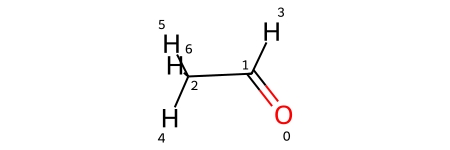

In [11]:
#visualizamos
cis

In [23]:
# visualizamos las coordenadas en el archivo XYZ
!cat initial_cis.xyz

cat: initial_cis.xyz: No such file or directory


In [20]:
smi_trans = "O=C\C"
trans = Chem.MolFromSmiles(smi_trans)
trans = Chem.AddHs(trans)
Chem.AllChem.EmbedMolecule(trans, useRandomCoords=False,randomSeed=1234)
Chem.MolToXYZFile(trans, "trans.xyz")

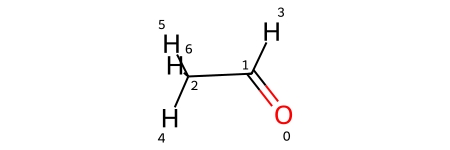

In [19]:
trans

In [21]:
!cat trans.xyz

7

O      1.570469   -0.925067    0.049356
C      0.826591    0.026082   -0.025572
C     -0.642282   -0.038785    0.019920
H      1.291327    1.002172   -0.135095
H     -1.064807   -1.005497   -0.293077
H     -1.031317    0.721575   -0.687780
H     -0.949981    0.219520    1.072249


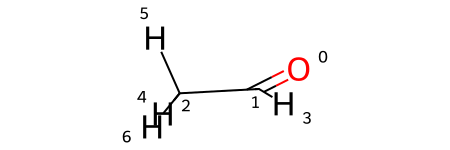

In [24]:
Chem.AllChem.SetDihedralDeg(cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(cis, "diedro90.xyz")
cis

In [25]:
!cat diedro90.xyz

7

O      1.576288    0.415712    0.800350
C      0.843750    0.047097   -0.100834
C     -0.612602   -0.032403    0.067367
H      1.297948   -0.225880   -1.046509
H     -0.923080   -0.412738    1.070141
H     -1.063816    0.981890   -0.017722
H     -1.118173   -0.650513   -0.711855


Calculo de Energia

In [26]:
cis = gto.M(atom="cis.xyz")

In [28]:
cis.basis = "6-31G"
mf_cis = cis.KS()
mf_cis.xc = 'b3lyp'

In [29]:
resultado_cis = mf_cis.kernel()
resultado_cis

converged SCF energy = -151.804318825823


-151.80431882582258

Diedro 90

In [30]:
cis_90 = gto.M(atom="diedro90.xyz")


In [31]:
cis_90.basis = "6-31G"
mf_90 = cis_90.KS()
mf_90.xc = 'b3lyp'

In [32]:
resultado_cis_90 = mf_90.kernel()
resultado_cis_90

converged SCF energy = -151.805172417551


-151.80517241755058

TRANS

In [33]:
trans = gto.M(atom="trans.xyz")


In [34]:
trans.basis = "6-31G"
mf_trans = trans.KS()
mf_trans.xc = 'b3lyp'

In [35]:
resultado_trans= mf_trans.kernel()
resultado_trans

converged SCF energy = -151.80435321315


-151.8043532131503

Grafica

In [36]:
%%capture
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [37]:
import matplotlib.pyplot as plt
from energydiagram import ED

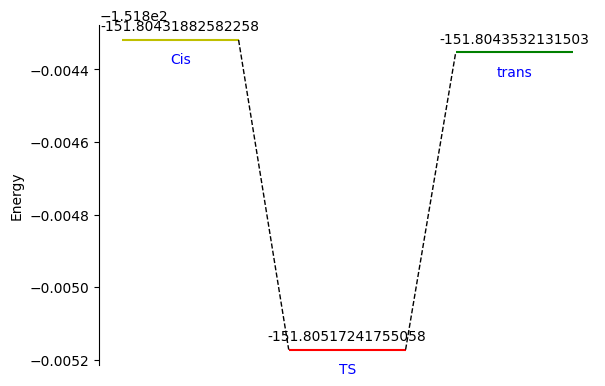

In [44]:
diagram = ED()
diagram.add_level(resultado_cis,'Cis',color='y')
diagram.add_level(resultado_cis_90,'TS',color='r')
diagram.add_level(resultado_trans,'trans',color='g')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy") # / Kcal mol-1")



Cinetica

In [41]:
E_activacion = resultado_cis_90 - resultado_cis
E_activacion

-0.0008535917280028116

Termodinamica

In [42]:
entalpia = resultado_trans - resultado_cis
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")


La reacción es exotérmica
